In [1]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from  matplotlib.colors import LinearSegmentedColormap

c = ['darkblue', 'blue', 'lightblue', 'white', 'lightcoral', 'red', 'darkred']
v = [0,.15,.4,.5,0.6,.9,1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)

In [2]:
df4 = pd.read_csv('log_5.csv', names=['percentage_lazy','chance_of_selfishness','num_agents','avg_health' ])
df4['chance_of_selfishness'] = df4['chance_of_selfishness']
df4['adjusted_fitness'] = (df4['num_agents'] * df4['avg_health']) / 20

df4['percentage_wandering'] = 1-df4['percentage_lazy']

df4['adjusted_chance_of_selfishness'] = df4['chance_of_selfishness'] * df4['percentage_wandering']
df4['adjusted_chance_of_sharing'] = (1-df4['chance_of_selfishness']) * df4['percentage_wandering']

percentage_lazy = df4['percentage_lazy']
coself = df4['adjusted_chance_of_selfishness']
cosharing = df4['adjusted_chance_of_sharing']
num_agents = df4['num_agents']
avg_health = df4['avg_health']
fitness = df4['adjusted_fitness']

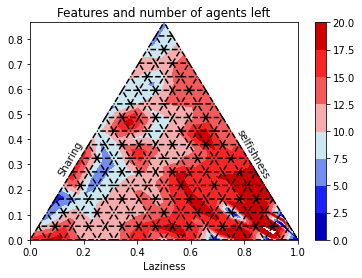

In [3]:
percentage_lazy = df4['percentage_lazy']
coself = df4['adjusted_chance_of_selfishness']
cosharing = df4['adjusted_chance_of_sharing']
num_agents = df4['num_agents']
avg_health = df4['avg_health']
fitness = df4['adjusted_fitness']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

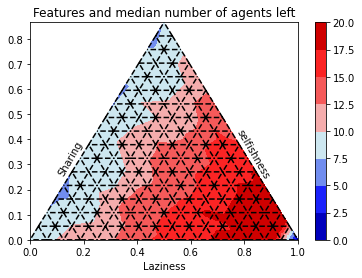

In [4]:
grouped_multiple = df4.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
num_agents = grouped_multiple['num_agents']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

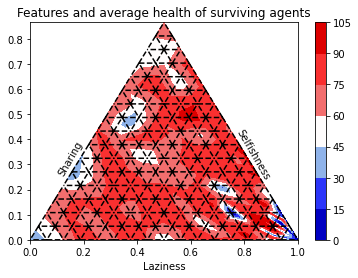

In [5]:
percentage_lazy = df4['percentage_lazy']
coself = df4['adjusted_chance_of_selfishness']
cosharing = df4['adjusted_chance_of_sharing']
num_agents = df4['num_agents']
avg_health = df4['avg_health']
fitness = df4['adjusted_fitness']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and average health of surviving agents')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'Selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

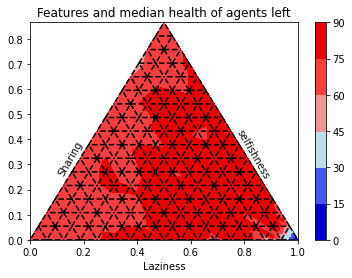

In [6]:
grouped_multiple = df4.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'avg_health': ['median']})
grouped_multiple.columns = ['avg_health']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
average = grouped_multiple['avg_health']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = average

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median health of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

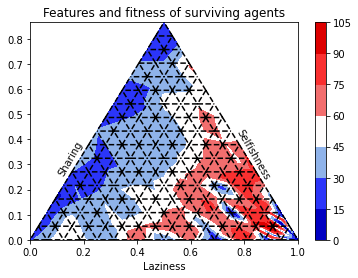

In [7]:
percentage_lazy = df4['percentage_lazy']
coself = df4['adjusted_chance_of_selfishness']
cosharing = df4['adjusted_chance_of_sharing']
num_agents = df4['num_agents']
avg_health = df4['avg_health']
fitness = df4['adjusted_fitness']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and fitness of surviving agents')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'Selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

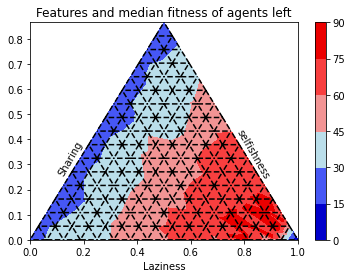

In [8]:
grouped_multiple = df4.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'adjusted_fitness': ['median']})
grouped_multiple.columns = ['adjusted_fitness']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
fitness = grouped_multiple['adjusted_fitness']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median fitness of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [9]:
grouped_multiple = df4.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
num_agents = grouped_multiple['num_agents']
# avg_health = df4['avg_health']

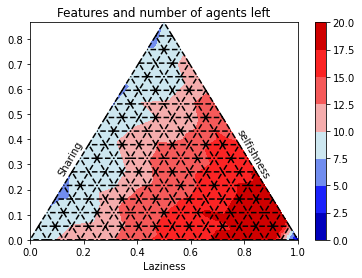

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [11]:
df = df4

In [17]:
pd.set_option('display.max_rows', 150)
g = df.groupby(['percentage_lazy', 'chance_of_selfishness'])['num_agents'].median()
f = df.groupby(['percentage_lazy', 'chance_of_selfishness'])['adjusted_fitness'].median()

In [18]:
g

percentage_lazy  chance_of_selfishness
0.0              0.0                       7.5
                 0.1                       7.0
                 0.2                       9.5
                 0.3                       7.0
                 0.4                       7.5
                 0.5                       8.5
                 0.6                       8.5
                 0.7                       7.5
                 0.8                       7.0
                 0.9                       8.0
                 1.0                       7.5
0.1              0.0                       9.0
                 0.1                       9.0
                 0.2                       9.5
                 0.3                      10.0
                 0.4                       9.0
                 0.5                      10.0
                 0.6                       8.5
                 0.7                       9.5
                 0.8                       8.0
                 0.9 

In [19]:
f

percentage_lazy  chance_of_selfishness
0.0              0.0                      25.088542
                 0.1                      21.321597
                 0.2                      28.560208
                 0.3                      25.691597
                 0.4                      25.561736
                 0.5                      25.260556
                 0.6                      23.076389
                 0.7                      22.796597
                 0.8                      21.815972
                 0.9                      26.138333
                 1.0                      24.875764
0.1              0.0                      29.443056
                 0.1                      31.655625
                 0.2                      31.234792
                 0.3                      31.807014
                 0.4                      28.192847
                 0.5                      32.867887
                 0.6                      31.902222
                 0.7     

In [12]:
grouped_multiple = df4.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness', 'chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()

c = grouped_multiple.loc[(grouped_multiple['chance_of_selfishness']==1) | (grouped_multiple['chance_of_selfishness']==0)]

grouped_multiple = df4.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness', 'chance_of_selfishness']).agg({'adjusted_fitness': ['median']})
grouped_multiple.columns = ['adjusted_fitness']
grouped_multiple = grouped_multiple.reset_index()

b = grouped_multiple.loc[(grouped_multiple['chance_of_selfishness']==1) | (grouped_multiple['chance_of_selfishness']==0)]

b = b[['percentage_lazy', 'chance_of_selfishness', 'adjusted_fitness']]
new_df = pd.merge(b, c,  how='inner', on = ['percentage_lazy','chance_of_selfishness'])


new_df[['percentage_lazy', 'chance_of_selfishness', 'num_agents', 'adjusted_fitness']]

,percentage_lazy,chance_of_selfishness,num_agents,adjusted_fitness
0,0.0,1.0,7.5,24.875764
1,0.0,0.0,7.5,25.088542
2,0.1,1.0,10.0,34.510000
3,0.1,0.0,9.0,29.443056
4,0.2,1.0,11.5,40.206042
5,0.2,0.0,11.0,37.364653
6,0.3,1.0,12.0,44.855903
7,0.3,0.0,12.0,48.877639
8,0.4,1.0,14.5,57.649350
9,0.4,0.0,14.0,54.340669


In [13]:
df['group'] = np.where(
    ((df.percentage_lazy > 0)&(df.percentage_lazy <= 0.3)) & (df.chance_of_selfishness <= 0.4), 
    'low-low',
    np.where((df.percentage_lazy > 0)& ((df.percentage_lazy <= 0.3)) & ((df.chance_of_selfishness > 0.4) & (df.chance_of_selfishness <= 0.6)), 
             'low-medium',
    np.where((df.percentage_lazy > 0)& ((df.percentage_lazy <= 0.3)) & ((df.chance_of_selfishness > 0.6) & (df.chance_of_selfishness <= 0.9)),
             'low-high',
    np.where((df.percentage_lazy > 0.3)& ((df.percentage_lazy <= 0.6)) & (df.chance_of_selfishness <= 0.4), 
             'medium-low',
    np.where((df.percentage_lazy > 0.3)& ((df.percentage_lazy <= 0.6)) & ((df.chance_of_selfishness > 0.4) & (df.chance_of_selfishness <= 0.6)), 
             'medium-medium',
    np.where((df.percentage_lazy > 0.3)& ((df.percentage_lazy <= 0.6)) & ((df.chance_of_selfishness > 0.6) & (df.chance_of_selfishness <= 0.9)),
             'medium-high',
    np.where((df.percentage_lazy > 0.6)& ((df.percentage_lazy <= 0.9)) & (df.chance_of_selfishness <= 0.4), 
             'high-low',
    np.where((df.percentage_lazy > 0.6)& ((df.percentage_lazy <= 0.9)) & ((df.chance_of_selfishness > 0.4) & (df.chance_of_selfishness <= 0.6)), 
             'high-medium',
    np.where((df.percentage_lazy > 0.6)& ((df.percentage_lazy <= 0.9)) & ((df.chance_of_selfishness > 0.6) & (df.chance_of_selfishness <= 0.9)),
             'high-high',
             'extremes')))))))))


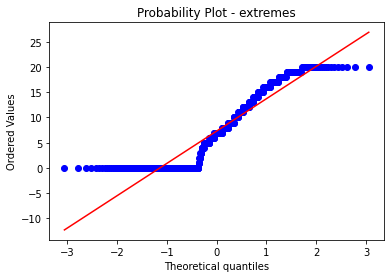

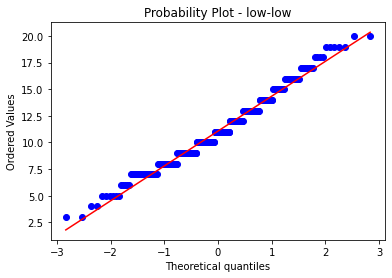

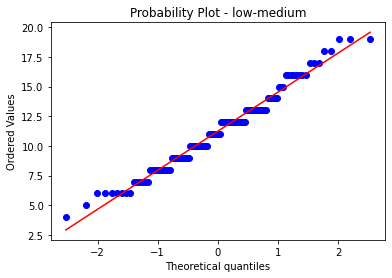

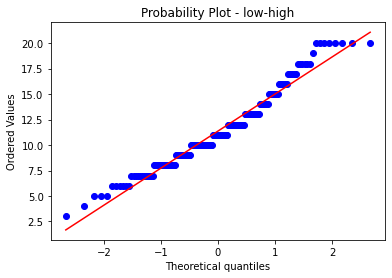

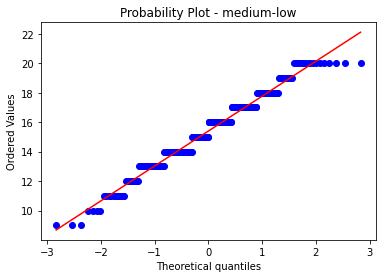

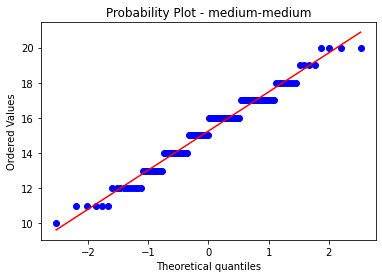

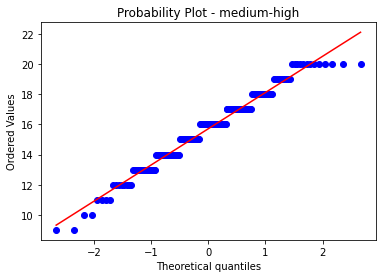

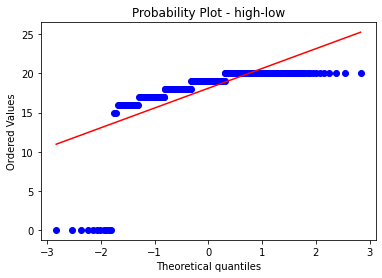

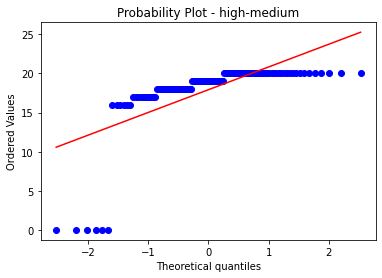

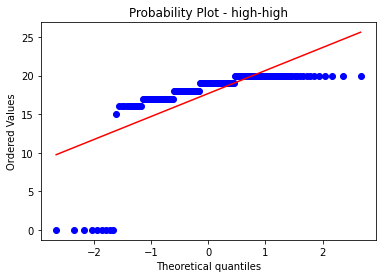

In [14]:
selfishness = df

import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_selfishness = selfishness['group'].unique()
for major in unique_selfishness:
    stats.probplot(selfishness[selfishness['group'] == major]['num_agents'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

# Poisson

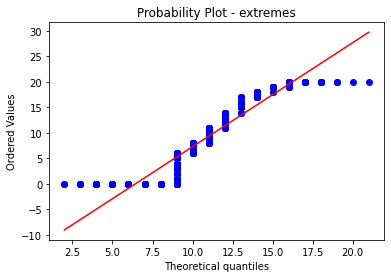

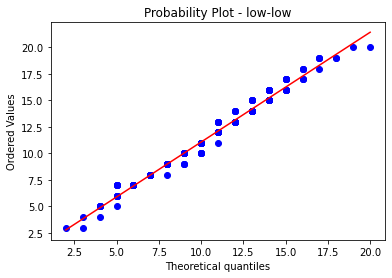

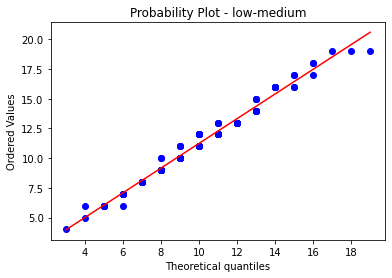

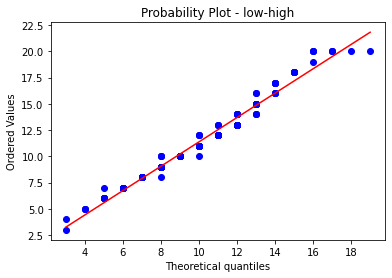

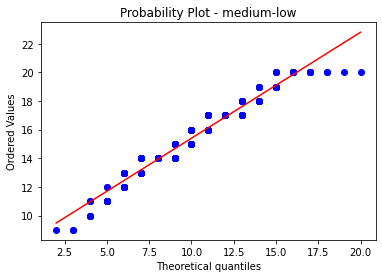

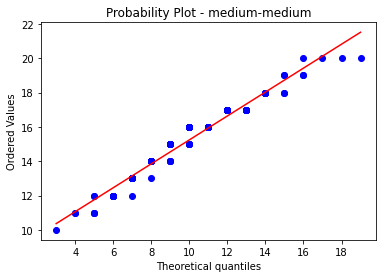

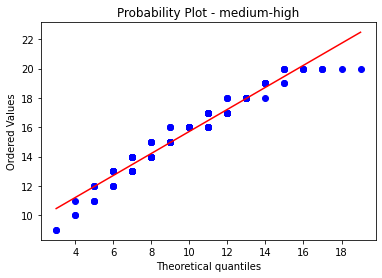

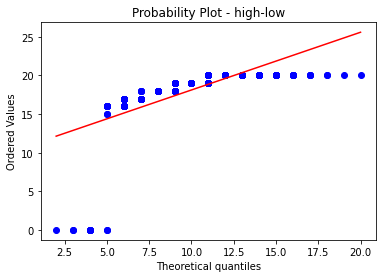

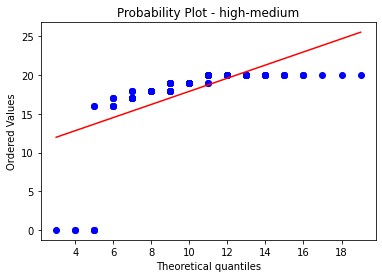

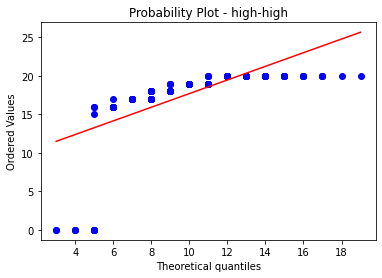

In [15]:
unique_selfishness = selfishness['group'].unique()
for major in unique_selfishness:
    stats.probplot(selfishness[selfishness['group'] == major]['num_agents'], dist=stats.poisson(mu=10), plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

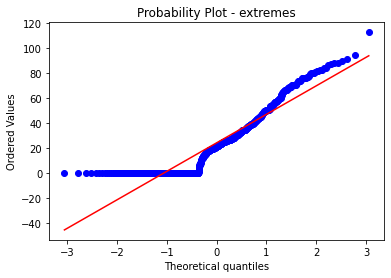

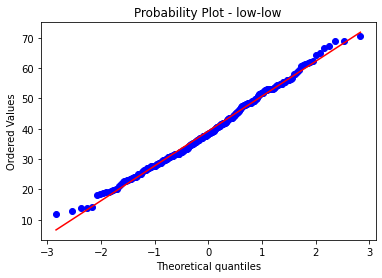

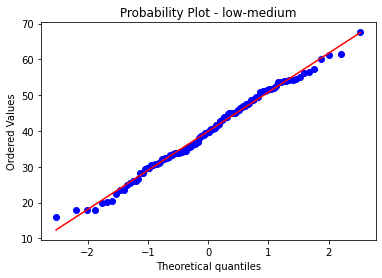

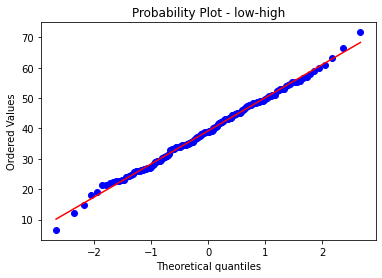

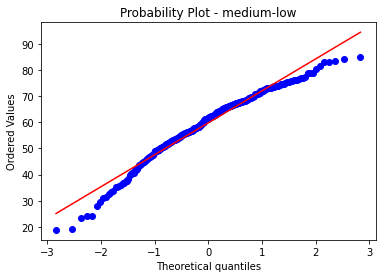

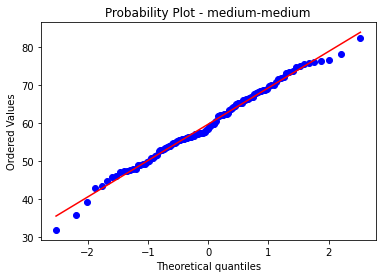

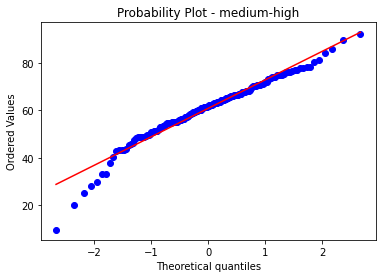

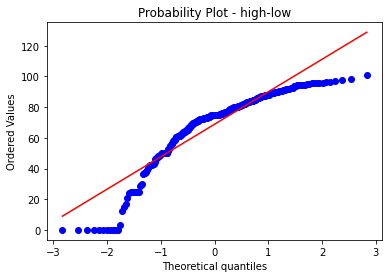

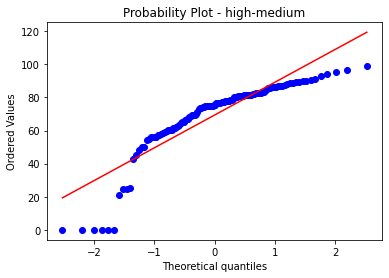

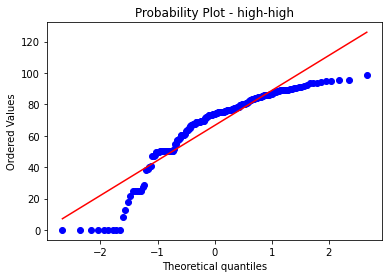

In [16]:
selfishness = df

import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_selfishness = selfishness['group'].unique()
for major in unique_selfishness:
    stats.probplot(selfishness[selfishness['group'] == major]['adjusted_fitness'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

In [17]:
from scipy import stats

df2 = df[['group', 'num_agents']]

x = df2.loc[df['group'] == 'low-low']['num_agents'].tolist()
xx = df2.loc[df['group'] == 'low-medium']['num_agents'].tolist()
xxx = df2.loc[df['group'] == 'low-high']['num_agents'].tolist()
y = df2.loc[df['group'] == 'medium-low']['num_agents'].tolist()
yy = df2.loc[df['group'] == 'medium-medium']['num_agents'].tolist()
yyy = df2.loc[df['group'] == 'medium-high']['num_agents'].tolist()
z = df2.loc[df['group'] == 'high-low']['num_agents'].tolist()
zz = df2.loc[df['group'] == 'high-medium']['num_agents'].tolist()
zzz = df2.loc[df['group'] == 'high-high']['num_agents'].tolist()

stats.kruskal(x,xx, xxx, y, yy, yyy, z,zz, zz)

KruskalResult(statistic=935.1334097552323, pvalue=1.4877471218984935e-196)

In [18]:
data = [x, xx, xxx, y, yy, yyy, z, zz, zzz]

import scikit_posthocs as sp
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3,4,5,6,7,8,9
1,1.000000e+00,1.000000e+00,1.000000e+00,3.028173e-27,7.485600e-14,1.370676e-24,1.975810e-112,2.513468e-63,1.447533e-75
2,1.000000e+00,1.000000e+00,1.000000e+00,1.414640e-14,5.295146e-09,8.115699e-15,2.441595e-62,5.660920e-43,7.941758e-47
3,1.000000e+00,1.000000e+00,1.000000e+00,9.742302e-17,2.253075e-09,2.078241e-16,1.007202e-76,2.396203e-48,1.082584e-54
4,3.028173e-27,1.414640e-14,9.742302e-17,1.000000e+00,1.000000e+00,1.000000e+00,2.495425e-29,3.083835e-16,1.348696e-17
5,7.485600e-14,5.295146e-09,2.253075e-09,1.000000e+00,1.000000e+00,1.000000e+00,1.106914e-18,1.142728e-12,1.095819e-12
6,1.370676e-24,8.115699e-15,2.078241e-16,1.000000e+00,1.000000e+00,1.000000e+00,4.130475e-18,3.670661e-11,2.796565e-11
7,1.975810e-112,2.441595e-62,1.007202e-76,2.495425e-29,1.106914e-18,4.130475e-18,1.000000e+00,1.000000e+00,1.000000e+00
8,2.513468e-63,5.660920e-43,2.396203e-48,3.083835e-16,1.142728e-12,3.670661e-11,1.000000e+00,1.000000e+00,1.000000e+00
9,1.447533e-75,7.941758e-47,1.082584e-54,1.348696e-17,1.095819e-12,2.796565e-11,1.000000e+00,1.000000e+00,1.000000e+00


In [20]:
from scipy import stats

df2 = df[['group', 'adjusted_fitness']]

x = df2.loc[df['group'] == 'low-low']['adjusted_fitness'].tolist()
xx = df2.loc[df['group'] == 'low-medium']['adjusted_fitness'].tolist()
xxx = df2.loc[df['group'] == 'low-high']['adjusted_fitness'].tolist()
y = df2.loc[df['group'] == 'medium-low']['adjusted_fitness'].tolist()
yy = df2.loc[df['group'] == 'medium-medium']['adjusted_fitness'].tolist()
yyy = df2.loc[df['group'] == 'medium-high']['adjusted_fitness'].tolist()
z = df2.loc[df['group'] == 'high-low']['adjusted_fitness'].tolist()
zz = df2.loc[df['group'] == 'high-medium']['adjusted_fitness'].tolist()
zzz = df2.loc[df['group'] == 'high-high']['adjusted_fitness'].tolist()

stats.kruskal(x,xx, xxx, y, yy, yyy, z,zz, zz)

KruskalResult(statistic=805.1551603764204, pvalue=1.5937354921617463e-168)

In [21]:
data = [x, xx, xxx, y, yy, yyy, z, zz, zzz]

import scikit_posthocs as sp
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3,4,5,6,7,8,9
1,1.000000e+00,1.000000e+00,1.000000e+00,9.254789e-40,3.927893e-22,4.438061e-33,1.247135e-83,2.056177e-51,1.388712e-55
2,1.000000e+00,1.000000e+00,1.000000e+00,1.233102e-21,1.034465e-14,3.369071e-20,2.928800e-46,7.500842e-35,2.413669e-34
3,1.000000e+00,1.000000e+00,1.000000e+00,3.495175e-30,8.372568e-19,9.228339e-27,2.857263e-63,1.556210e-43,7.230529e-45
4,9.254789e-40,1.233102e-21,3.495175e-30,1.000000e+00,1.000000e+00,1.000000e+00,3.925483e-08,9.804036e-06,6.990518e-04
5,3.927893e-22,1.034465e-14,8.372568e-19,1.000000e+00,1.000000e+00,1.000000e+00,7.247088e-05,3.511891e-04,1.389896e-02
6,4.438061e-33,3.369071e-20,9.228339e-27,1.000000e+00,1.000000e+00,1.000000e+00,1.119501e-04,8.794560e-04,3.871508e-02
7,1.247135e-83,2.928800e-46,2.857263e-63,3.925483e-08,7.247088e-05,1.119501e-04,1.000000e+00,1.000000e+00,1.000000e+00
8,2.056177e-51,7.500842e-35,1.556210e-43,9.804036e-06,3.511891e-04,8.794560e-04,1.000000e+00,1.000000e+00,1.000000e+00
9,1.388712e-55,2.413669e-34,7.230529e-45,6.990518e-04,1.389896e-02,3.871508e-02,1.000000e+00,1.000000e+00,1.000000e+00
